In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
import pickle

from tqdm import tqdm

from collections import Counter

from linearization.analyzer import SAELinearizer
from linearization.visualization import visualize_topk

In [4]:
EXPANSION_FACTOR = 64

In [9]:
# OVERRIDE = True
OVERRIDE = False

path = f"../data/pickled_linearizers/gelu_2l_{EXPANSION_FACTOR}.pkl"

# sae_names = [
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer0/seed42_ln2_normalized/final_sparse_autoencoder_gelu-2l_blocks.0.ln2.hook_normalized_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer0/seed42_mlp_out/final_sparse_autoencoder_gelu-2l_blocks.0.hook_mlp_out_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer0/seed42_transcoder/final_sparse_autoencoder_gelu-2l_blocks.0.ln2.hook_normalized_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer1/seed42_ln2_normalized/final_sparse_autoencoder_gelu-2l_blocks.1.ln2.hook_normalized_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer1/seed42_mlp_out/final_sparse_autoencoder_gelu-2l_blocks.1.hook_mlp_out_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer1/seed42_transcoder/final_sparse_autoencoder_gelu-2l_blocks.1.ln2.hook_normalized_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer0/seed43_ln2_normalized/final_sparse_autoencoder_gelu-2l_blocks.0.ln2.hook_normalized_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer0/seed43_mlp_out/final_sparse_autoencoder_gelu-2l_blocks.0.hook_mlp_out_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer0/seed43_transcoder/final_sparse_autoencoder_gelu-2l_blocks.0.ln2.hook_normalized_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer1/seed43_ln2_normalized/final_sparse_autoencoder_gelu-2l_blocks.1.ln2.hook_normalized_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer1/seed43_mlp_out/final_sparse_autoencoder_gelu-2l_blocks.1.hook_mlp_out_16384.pt",
#     f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer1/seed43_transcoder/final_sparse_autoencoder_gelu-2l_blocks.1.ln2.hook_normalized_16384.pt",
# ]

# Automated SAE name generation
seeds = [42, 43]
layers = [0, 1]
names1 = ["ln2_normalized", "mlp_out", "transcoder"]
names2 = ["ln2.hook_normalized", "hook_mlp_out", "ln2.hook_normalized"]

sae_names = []
for seed in seeds:
    for layer in layers:
        for name1, name2 in zip(names1, names2):
            sae_names.append(
                f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer{layer}/seed{seed}_{name1}/final_sparse_autoencoder_gelu-2l_blocks.{layer}.{name2}_{512 * EXPANSION_FACTOR}.pt"
            )

if os.path.exists(path) and not OVERRIDE:
    lin = pickle.load(open(path, "rb"))
else:
    lin = SAELinearizer(
        model_name="gelu-2l",
        sae_names=sae_names,
        layers=[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
        dataset_name="NeelNanda/pile-10k",
        act_name="normalized",
        num_batches=10,
        half_precision=False,
        # transcoder=True,
        # use_gpt=True,
        # dict_mult=64,
        # hook_point="resid_mid",
        run_analysis=True,
    )
    with open(path, "wb") as f:
        pickle.dump(lin, f)

Loaded pretrained model gelu-2l into HookedTransformer
Moving model to device:  cuda
Model device: cuda:0
Tokens shape: torch.Size([125337, 128]), dtype: torch.int64, device: cuda:0
Loading ../scripts/checkpoints/64x_gelu_2l/layer0/seed42_ln2_normalized/final_sparse_autoencoder_gelu-2l_blocks.0.ln2.hook_normalized_32768.pt from disk
Encoder device: cuda:0
Loading ../scripts/checkpoints/64x_gelu_2l/layer0/seed42_mlp_out/final_sparse_autoencoder_gelu-2l_blocks.0.hook_mlp_out_32768.pt from disk
Encoder device: cuda:0
Loading ../scripts/checkpoints/64x_gelu_2l/layer0/seed42_transcoder/final_sparse_autoencoder_gelu-2l_blocks.0.ln2.hook_normalized_32768.pt from disk
Encoder device: cuda:0
Loading ../scripts/checkpoints/64x_gelu_2l/layer1/seed42_ln2_normalized/final_sparse_autoencoder_gelu-2l_blocks.1.ln2.hook_normalized_32768.pt from disk
Encoder device: cuda:0
Loading ../scripts/checkpoints/64x_gelu_2l/layer1/seed42_mlp_out/final_sparse_autoencoder_gelu-2l_blocks.1.hook_mlp_out_32768.pt fro

100%|██████████| 10/10 [00:00<00:00, 21.32it/s]


Num dead 0.00921630859375


100%|██████████| 10/10 [00:00<00:00, 33.60it/s]


Num dead 0.574188232421875


100%|██████████| 10/10 [00:00<00:00, 29.27it/s]


Num dead 0.153594970703125


100%|██████████| 10/10 [00:00<00:00, 31.31it/s]


Num dead 0.00274658203125


100%|██████████| 10/10 [00:00<00:00, 30.44it/s]


Num dead 0.73809814453125


100%|██████████| 10/10 [00:00<00:00, 32.35it/s]


Num dead 0.240386962890625


100%|██████████| 10/10 [00:00<00:00, 32.78it/s]


Num dead 0.006439208984375


100%|██████████| 10/10 [00:00<00:00, 33.21it/s]


Num dead 0.755340576171875


100%|██████████| 10/10 [00:00<00:00, 29.98it/s]


Num dead 0.144134521484375


100%|██████████| 10/10 [00:00<00:00, 30.83it/s]


Num dead 0.00299072265625


100%|██████████| 10/10 [00:00<00:00, 32.71it/s]


Num dead 0.7178955078125


100%|██████████| 10/10 [00:00<00:00, 27.59it/s]


Num dead 0.2099609375


100%|██████████| 10/10 [00:42<00:00,  4.25s/it]


In [36]:
# 5 features, uniformly sampled by frequency, seed 42 layer 0:

# sae_name = "../scripts/checkpoints/32x_gelu_2l/layer0/seed42_transcoder/final_sparse_autoencoder_gelu-2l_blocks.0.ln2.hook_normalized_16384.pt"
LAYER = 1
SEED = 42
sae_name = f"../scripts/checkpoints/{EXPANSION_FACTOR}x_gelu_2l/layer{LAYER}/seed{SEED}_transcoder/final_sparse_autoencoder_gelu-2l_blocks.{LAYER}.ln2.hook_normalized_{512 * EXPANSION_FACTOR}.pt"
freqs = lin.frequencies[sae_name]

my_sample = np.argsort(freqs.cpu().numpy())[::-1][:: len(freqs) // 5]
print(" ".join([f"{x}: {freqs[x].item()}" for x in my_sample]))

10563: 0.27000734210014343 22537: 0.002905273577198386 20889: 0.0006591796991415322 21770: 0.00019531250291038305 241: 0.0 21470: 0.0


In [37]:
def set_and_visualize(feature_idx, l=0):
    lin.set_feature(feature_idx, sae_name, num_batches=10)

    fig, axs = plt.subplots(2, 1, figsize=(20, 10))

    ax = visualize_topk(
        examples=lin.top_examples["examples"].detach().cpu().numpy(),
        activations=lin.top_examples["activations"].detach().cpu().numpy(),
        columns=lin.top_examples["cols"].detach().cpu().numpy(),
        model=lin.model,
        trim=20,
        zero_negatives=False,
        ax=axs[0],
    )
    axs[0].set_title(f"Top activating examples")

    ax = visualize_topk(
        examples=lin.uniform_ranked_examples["examples"].detach().cpu().numpy(),
        activations=lin.uniform_ranked_examples["activations"].detach().cpu().numpy(),
        columns=lin.uniform_ranked_examples["cols"].detach().cpu().numpy(),
        model=lin.model,
        trim=20,
        zero_negatives=False,
        ax=axs[1],
    )
    axs[1].set_title(f"Uniform examples")

    fig.suptitle(f"Feature {feature_idx} in layer {l}, sparsity: {100*lin.frequencies[sae_name][feature_idx]:.3f}%")

    plt.tight_layout()
    plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 33.58it/s]
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/home/phil/miniconda3/envs/mats/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


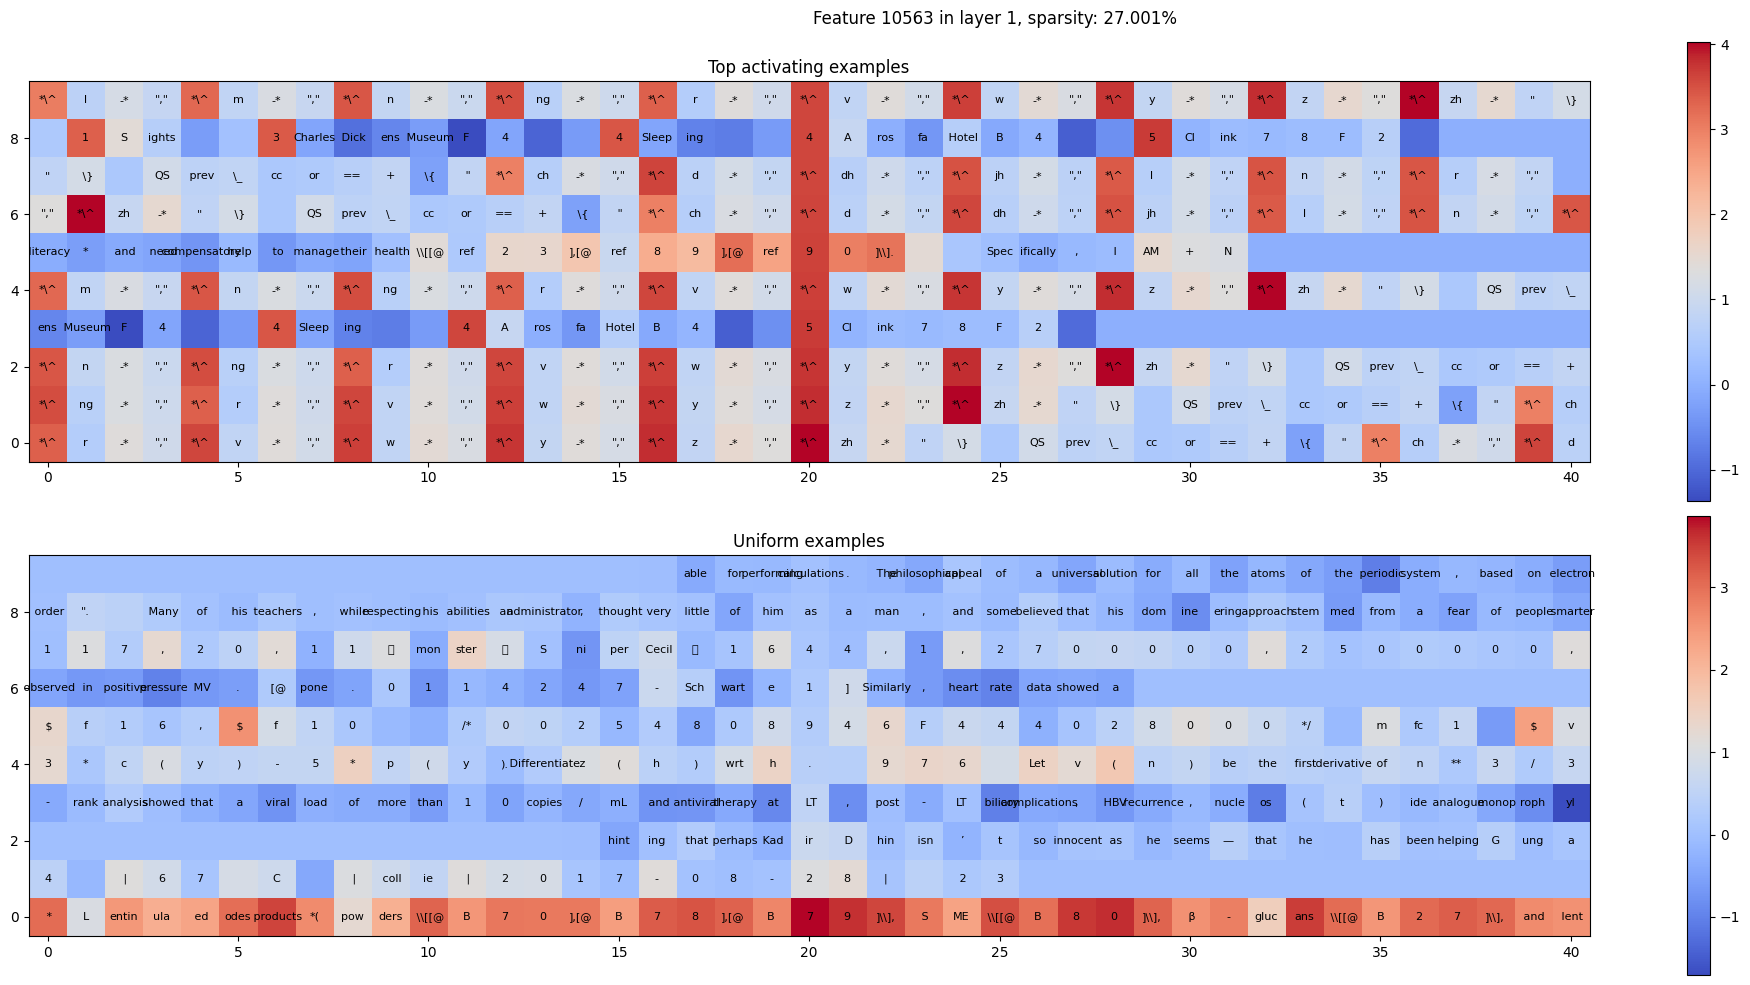

In [38]:
set_and_visualize(my_sample[0], l=LAYER)

In [39]:
set_and_visualize(my_sample[1], l=LAYER)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 24.07it/s]
) missing from current font.6526.py:30: UserWarning: Glyph 13 (
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 22580 (\N{CJK UNIFIED IDEOGRAPH-5834}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 19990 (\N{CJK UNIFIED IDEOGRAPH-4E16}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from current font.
  plt.tight_layout()
/tmp/ip

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 31.89it/s]


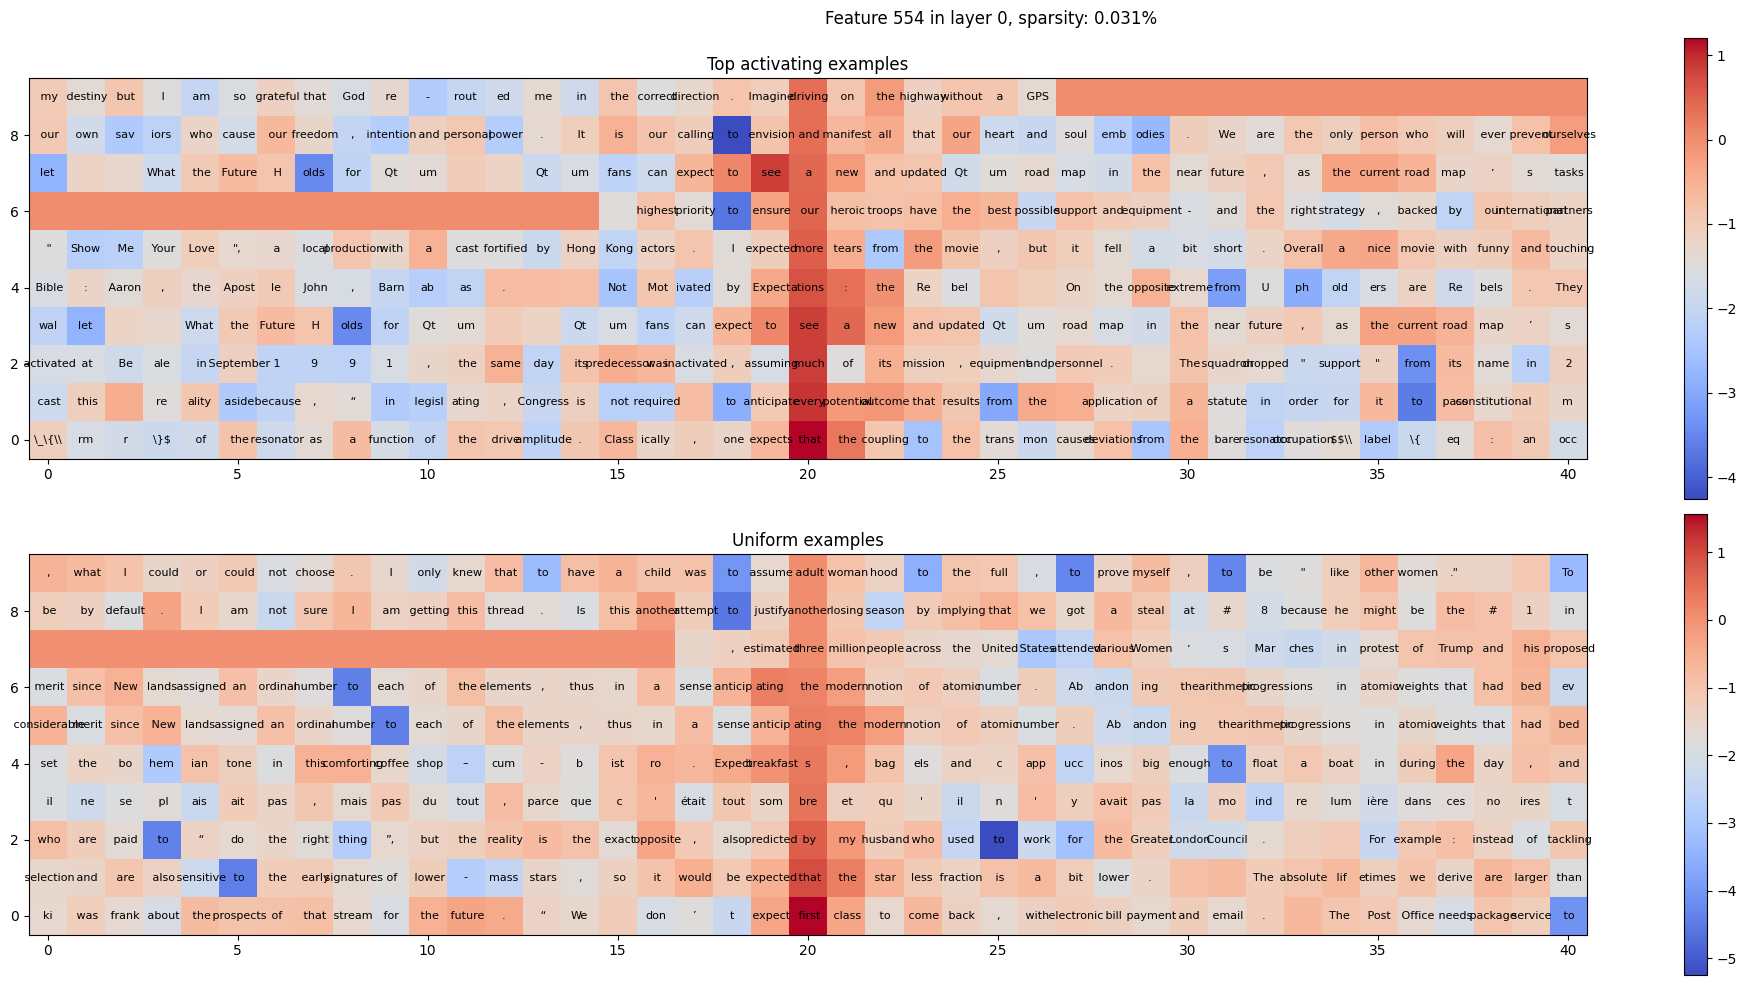

In [ ]:
set_and_visualize(my_sample[2], l=LAYER)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 33.21it/s]
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_688068/3688446526.py:30: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing fro

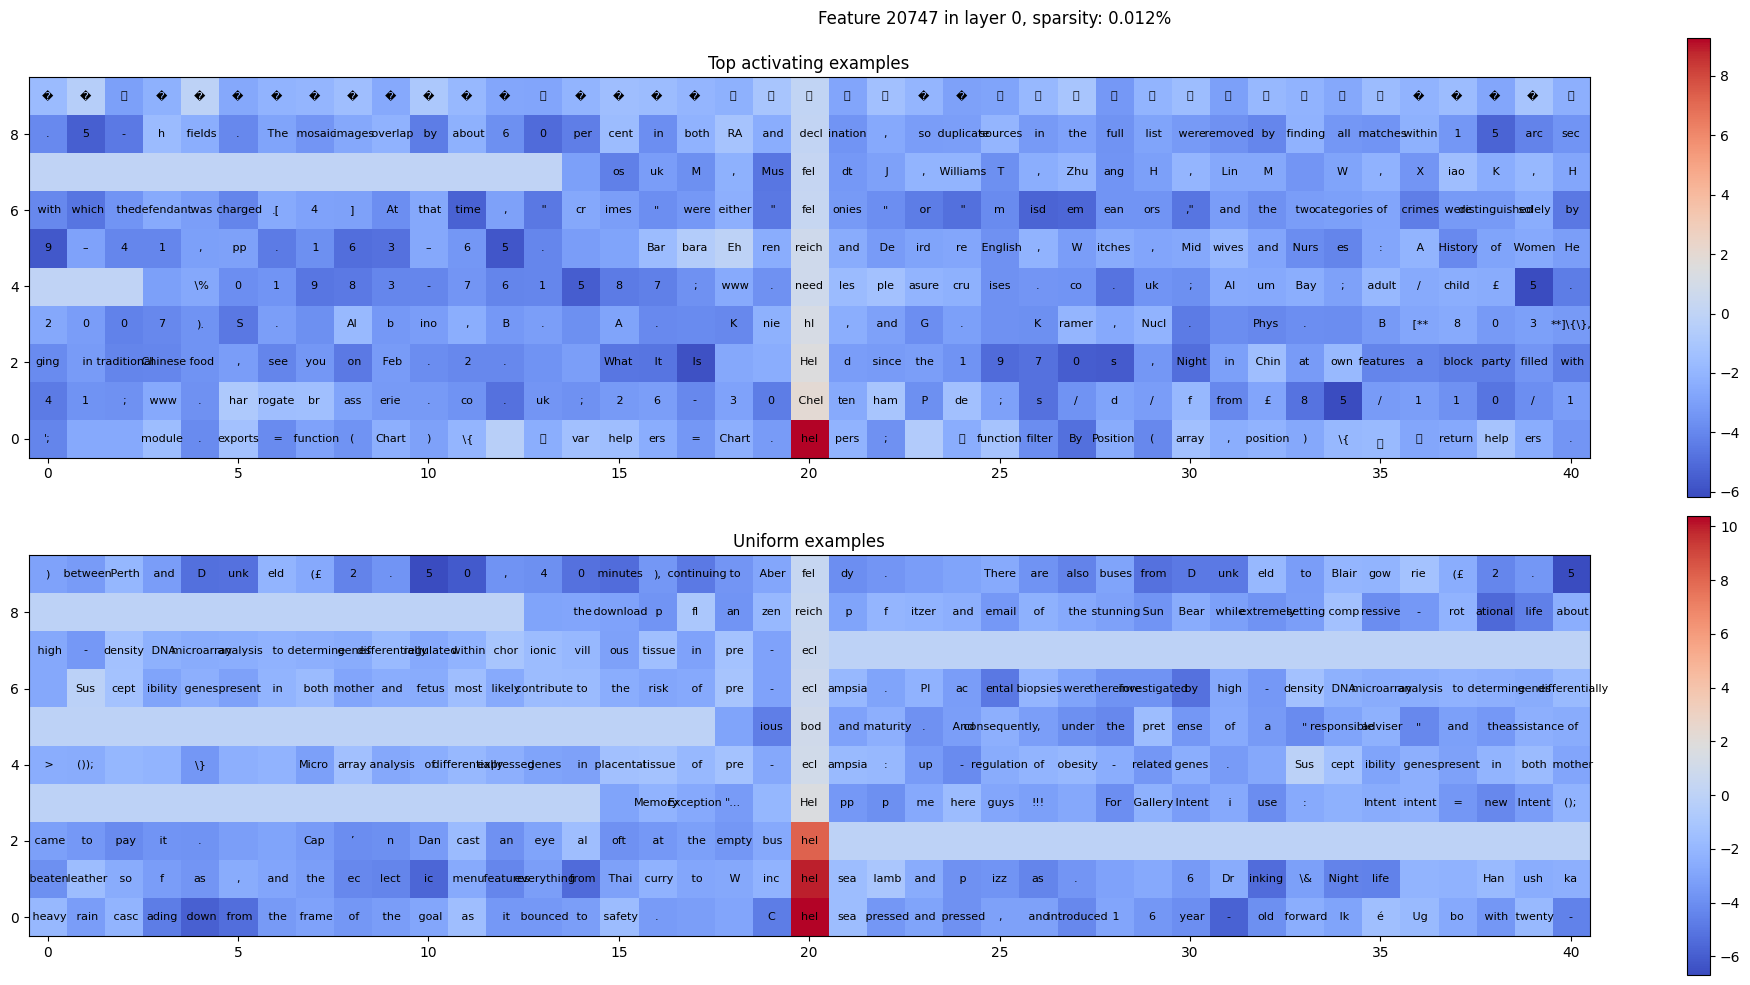

In [ ]:
set_and_visualize(my_sample[3], l=LAYER)

 40%|████      | 4/10 [00:00<00:00, 36.00it/s]

100%|██████████| 10/10 [00:00<00:00, 28.62it/s]
/home/phil/mlp_linearization/src/linearization/visualization.py:55: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cax = ax.imshow(trimmed_activations, cmap="coolwarm")  # , vmin=0)
/home/phil/mlp_linearization/src/linearization/visualization.py:68: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(-0.5, trimmed_examples.shape[0] - 0.5)


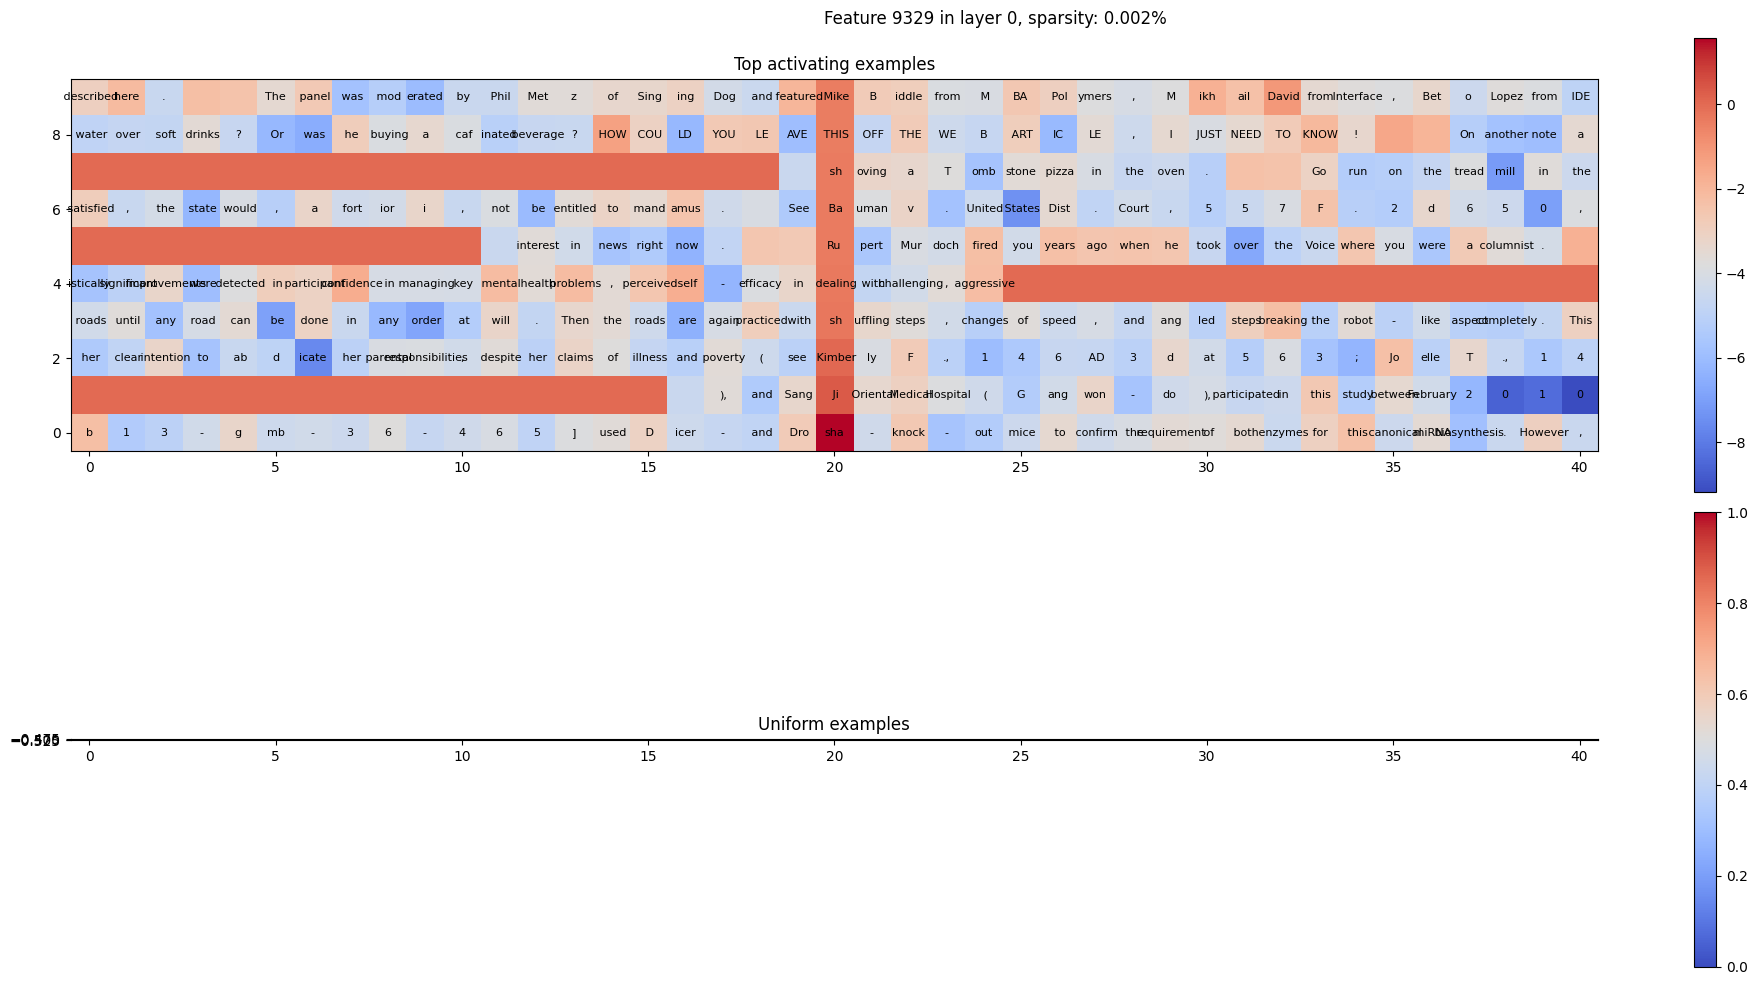

In [ ]:
set_and_visualize(my_sample[4], l=LAYER)